In [81]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
sns.set()
csv_2016 = "C:\\Users\\ushuel00\\Downloads\\2016_data .csv"
csv_2017 = "C:\\Users\\ushuel00\\Downloads\\2017_data .csv"
csv_2015 = "C:\\Users\\ushuel00\\Downloads\\2015_data .csv"

In [55]:
#read the files
df_2015 = pd.read_csv(csv_2015)
df_2016 = pd.read_csv(csv_2016)
df_2017 = pd.read_csv(csv_2017)

In [56]:
# Clean up data for use
df_2016['margin %'] = df_2016['margin %'].replace('#DIV/0!', "0")
df_2016['margin %'] = pd.to_numeric(df_2016['margin %'])

df_2017['margin %'] = df_2017['margin %'].replace('#DIV/0!', "0")
df_2017['margin %'] = pd.to_numeric(df_2017['margin %'])


In [57]:
# group by categories and see results, total quantity sold by category
category_group_2016 = df_2016.groupby('Category Description') 
sum_category_2016 = category_group_2016['quantity'].sum()
piechart_data2016 = sum_category_2016.drop(sum_category_2016.index[[0,8]])
piechart_data2016

Category Description
Active Bottoms           5521397
Basic Fleece Bottom      2093283
Boardshorts             51361445
Fleece Top              13566707
Hats                    21188785
Pants                    4436272
Sandals                 13963168
T-shirts               190458905
Tank Tops               15309264
Walkshorts              49625435
Wetsuits                 8737809
Woven Shirt             29938136
Name: quantity, dtype: int64

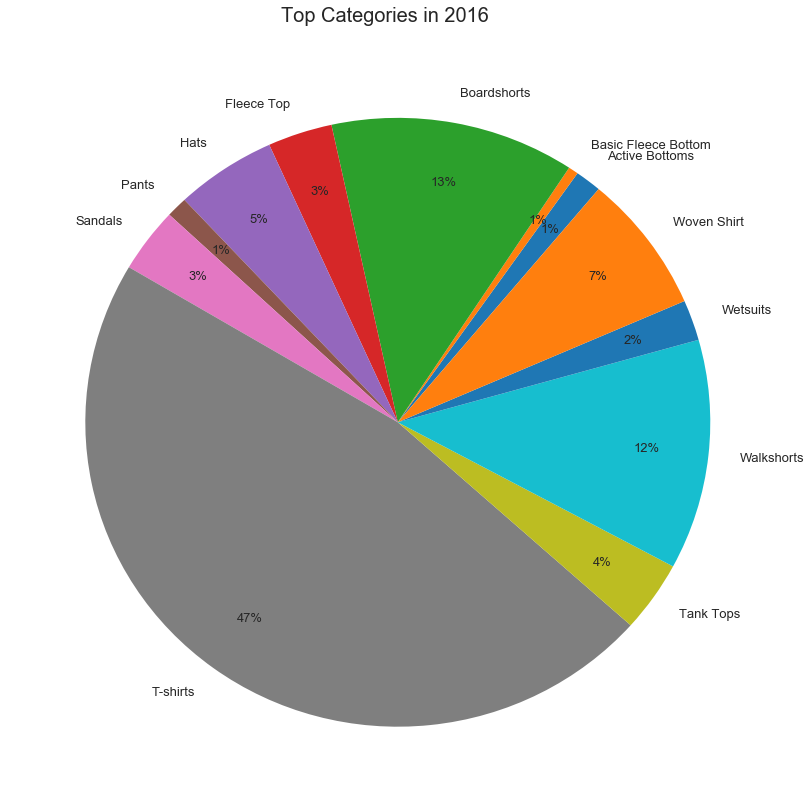

In [58]:
# make a pie chart to represent the %
top_2016_chart = piechart_data2016.plot(kind='pie',figsize=(14,14), fontsize=13, startangle=50, autopct='%1.0f%%', pctdistance=.80, labeldistance=1.1)
plt.ylabel("")
plt.figtext(0.5,.9,'Top Categories in 2016',fontsize=20,ha='center')
plt.savefig('top_categories_2016.png')
plt.show()

In [59]:
#group by categories and calculate the sum of total quantity sold
category_group_2017 = df_2017.groupby('Category Description') 
sum_category_2017 = category_group_2017['quantity'].sum()
piechart_data2017 = sum_category_2017.drop(sum_category_2016.index[[0,1]])
piechart_data2017

Category Description
Basic Fleece Bottom      2720160
Boardshorts             53443045
Fleece Top              13996022
Hats                    24192284
Pants                    5165129
Sandals                 11074508
Swimwear                 9026235
T-shirts               245559405
Tank Tops               27093586
Walkshorts              58760142
Wetsuits                13241346
Woven Shirt             14729239
Name: quantity, dtype: int64

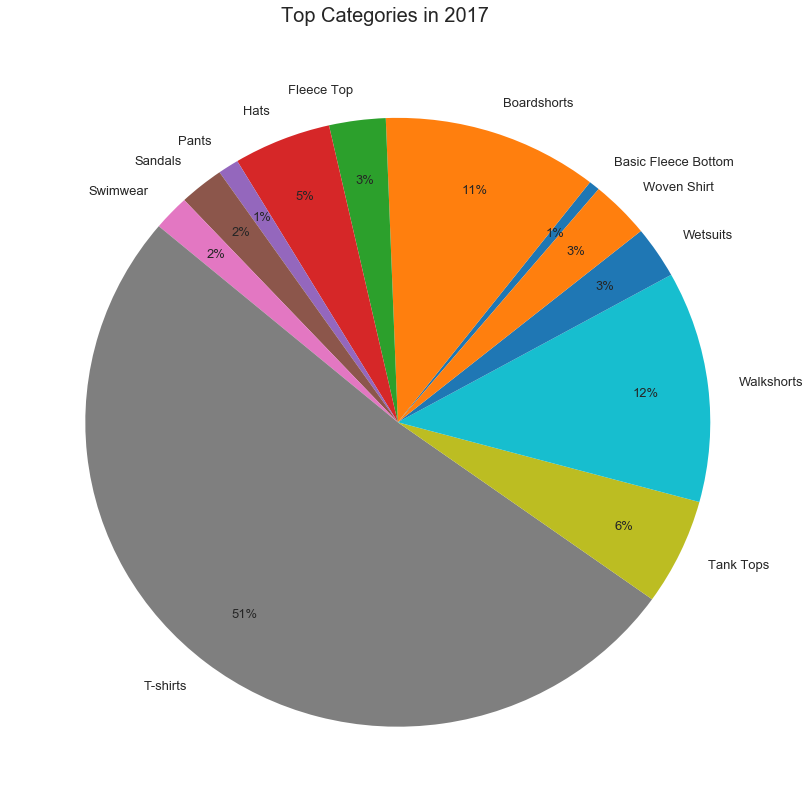

In [60]:
#make a pie chart to represent %
top_2017_chart = piechart_data2017.plot(kind='pie',figsize=(14,14), fontsize=13, startangle=50, autopct='%1.0f%%', pctdistance=.80, labeldistance=1.1)
plt.ylabel("")
plt.figtext(0.5,.9,'Top Categories in 2017',fontsize=20,ha='center')
plt.savefig('top_categories_2017.png',bbox_inches='tight')
plt.show()

In [61]:
#change the data type to numeric
df_2016["margin %"] = pd.to_numeric(df_2016["margin %"])
df_2016.head(3)

,Year,Warehouse,Division,Category Description,Style Description,Color,$ Unit Price - Outlet MSRP,$ Unit Cost - Standard,margin $,margin %,quantity
0,2016,Austin,Mens,Accessories,SUPER INVISIBLE BK SM,BLK,7.99,2.71,5.28,0.660826,3848
1,2016,Austin,Mens,Accessories,SUPER INVISIBLE BK SM,WHT,7.99,2.71,5.28,0.660826,4878
2,2016,Bakersfield,Mens,Accessories,SUPER INVISIBLE BK SM,BLK,7.99,2.71,5.28,0.660826,1776


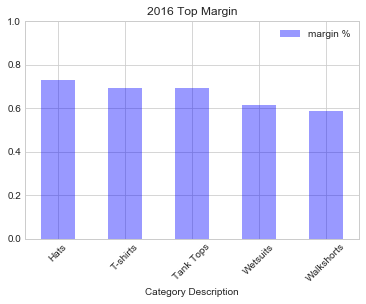

In [62]:
#group by categories and calculate the average margin $ and margin % for each category in 2016
category_2016 = df_2016.groupby("Category Description")
category_2016 = category_2016.mean()
highest_margin_2016 = category_2016.sort_values(["margin %"], ascending=False)
highest_margin_2016 = highest_margin_2016[:5]
highest_margin_2016 = highest_margin_2016.reset_index()
highest_margin_2016.plot.bar(x= "Category Description", y= "margin %", title = "2016 Top Margin", 
                             color = "blue", alpha = 0.4, ylim = (0, 1), rot = 45)
plt.savefig("2016 Top Margin.png", bbox_inches = 'tight')




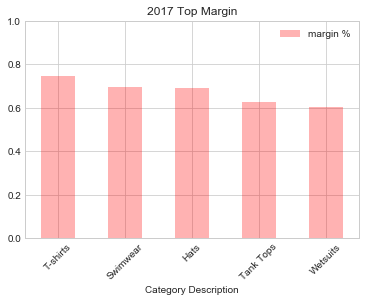

In [63]:
#gorup by categories for 2017, calculate the average margin $ and margin % for each category, 
#and only plot the top 5 categories/items in the chart

category_2017 = df_2017.groupby("Category Description")
category_2017 = category_2017.mean()
highest_margin_2017 = category_2017.sort_values(["margin %"], ascending=False)
highest_margin_2017 = highest_margin_2017[:5]
highest_margin_2017 = highest_margin_2017.reset_index()
highest_margin_2017
highest_margin_2017.plot.bar(x= "Category Description", y= "margin %", title = "2017 Top Margin", color = "red", alpha = 0.3, ylim = (0, 1), rot = 45)
plt.savefig("2017 Top Margin.png", bbox_inches = 'tight')

In [64]:
# Groupby item category for 2016
item_2016 = df_2016.groupby(['Category Description'])

# Calculate desired data
avg_mg16 = item_2016['margin %'].mean()
avg_q16 = item_2016['quantity'].mean()
mprice16 = item_2016['margin $'].sum()
avg_cost16 = item_2016['$ Unit Cost - Standard'].mean()
avg_price16 = item_2016['$ Unit Price - Outlet MSRP'].mean()

# Put it in a data frame
item_2016_df = pd.DataFrame({'Average Gross Margin % 2016': avg_mg16,
                  'Average Quantity 2016': avg_q16,
                  'Total Gross Margin $ 2016': mprice16,
                  'Average Cost 2016': avg_cost16,
                  'Average Price 2016': avg_price16})

# Reset index and put category back into column
item_2016_df.reset_index(level=0, inplace=True)

# Sort to show top 5 items by average gross margin rate
item_2016_df.sort_values(['Average Gross Margin % 2016'], ascending=False).head()

,Category Description,Average Cost 2016,Average Gross Margin % 2016,Average Price 2016,Average Quantity 2016,Total Gross Margin $ 2016
5,Hats,5.247987,0.727851,20.499661,9989.997643,32348.80
9,T-shirts,4.844922,0.693235,18.802533,17383.981836,152919.59
10,Tank Tops,5.849057,0.691567,19.865494,13742.606822,15614.31
12,Wetsuits,41.238531,0.614023,127.597151,12964.108309,58205.71
11,Walkshorts,12.502132,0.584598,33.470668,14531.606149,71607.55


In [65]:
# Groupby category description for 2017
item_2017 = df_2017.groupby(['Category Description'])

# Calculate desired data
avg_mg17 = item_2017['margin %'].mean()
avg_q17 = item_2017['quantity'].mean()
mprice17 = item_2017['margin $'].sum()
avg_cost17 = item_2017['$ Unit Cost - Standard'].mean()
avg_price17 = item_2017['$ Unit Price - Outlet MSRP'].mean()

# Put it in a data frame
item_2017_df = pd.DataFrame({'Average Gross Margin % 2017': avg_mg17,
                  'Average Quantity 2017': avg_q17,
                  'Total Gross Margin $ 2017': mprice17,
                  'Average Cost 2017': avg_cost17,
                  'Average Price 2017': avg_price17})

# Reset index
item_2017_df.reset_index(level=0, inplace=True)

# Sort to show top 5 items by avg gross margin rate
item_2017_df.sort_values(['Average Gross Margin % 2017'], ascending=False).head()

,Category Description,Average Cost 2017,Average Gross Margin % 2017,Average Price 2017,Average Quantity 2017,Total Gross Margin $ 2017
9,T-shirts,4.614252,0.746712,19.980015,22045.013466,171159.24
8,Swimwear,10.839432,0.694161,38.749744,16531.565934,15239.03
5,Hats,5.057925,0.693049,21.254145,9596.304641,40830.67
10,Tank Tops,4.779356,0.626216,14.860120,17115.341756,15957.85
12,Wetsuits,29.895943,0.603577,93.015950,10272.572537,81361.69


In [66]:
# Merge 2016 and 2017 category dfs 
items_merge = pd.merge(item_2016_df, item_2017_df, on='Category Description')
items_merge.head()

,Category Description,Average Cost 2016,Average Gross Margin % 2016,Average Price 2016,Average Quantity 2016,Total Gross Margin $ 2016,Average Cost 2017,Average Gross Margin % 2017,Average Price 2017,Average Quantity 2017,Total Gross Margin $ 2017
0,Accessories,11.049349,0.432977,17.980744,3644.534884,1490.25,5.988591,0.557739,11.973960,4281.704698,891.82
1,Active Bottoms,10.198651,0.531836,23.573586,9081.245066,8131.96,10.303614,0.547472,30.001647,8900.425703,4904.81
2,Basic Fleece Bottom,11.272262,0.538635,25.425045,4735.934389,6255.53,9.775931,0.574733,24.521171,4084.324324,9820.33
3,Boardshorts,13.083874,0.510508,31.074776,13470.087857,68599.31,12.056503,0.530503,27.589673,16464.277572,50420.67
4,Fleece Top,14.840432,0.534423,32.585449,9026.418496,26670.76,14.343724,0.500257,30.025688,7993.159338,27459.12


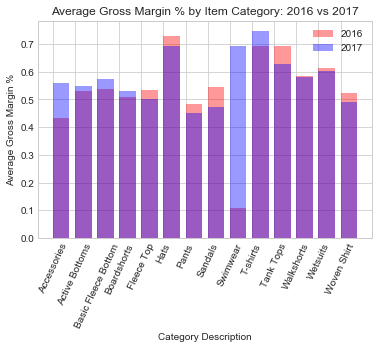

In [67]:
# Create multiple bar chart comparing gross margin between '16 and '17 by item category
multiple_bars = plt.figure()
x = items_merge['Category Description']
y = items_merge['Average Gross Margin % 2016']
z = items_merge['Average Gross Margin % 2017']


ax = plt.subplot(111)
ax.bar(x, y,width=0.75,color='r',align='edge', alpha = 0.4, label = "2016")
ax.bar(x, z,width=0.75,color='b',align='edge', alpha = 0.4, label = "2017")

# Rotate tick labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation=65)

# Create legend
legend=ax.legend()

# Create axes labels and title
plt.xlabel('Category Description')
plt.ylabel('Average Gross Margin %')
plt.title('Average Gross Margin % by Item Category: 2016 vs 2017')

# Save graph
plt.savefig("gross_margin_16_17.png",bbox_extra_artists=(legend,), bbox_inches='tight')

# Show graph
plt.show()

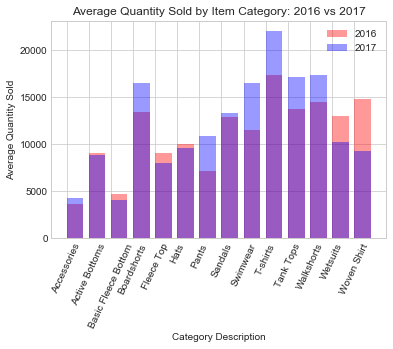

In [68]:
# Create multiple bar chart comparing gross margin between '16 and '17 by item category
multiple_bars = plt.figure()
x = items_merge['Category Description']
y = items_merge['Average Quantity 2016']
z = items_merge['Average Quantity 2017']


ax = plt.subplot(111)
ax.bar(x, y,width=0.75,color='r',align='edge', alpha = 0.4, label = "2016")
ax.bar(x, z,width=0.75,color='b',align='edge', alpha = 0.4, label = "2017")

# Rotate tick labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation=65)

# Create legend
legend=ax.legend()

# Create axes labels and title
plt.xlabel('Category Description')
plt.ylabel('Average Quantity Sold')
plt.title('Average Quantity Sold by Item Category: 2016 vs 2017')

# Save graph
plt.savefig("quantity_16_17.png",bbox_extra_artists=(legend,), bbox_inches='tight')

# Show graph
plt.show()

In [69]:
# Groupby store for 2016
store_2016 = df_2016.groupby(['Warehouse'])

# Calculate desired data 
store_avg_mg16 = store_2016['margin %'].mean()
store_avg_q16 = store_2016['quantity'].mean()
store_mprice16 = store_2016['margin $'].sum()
store_avg_cost16 = store_2016['$ Unit Cost - Standard'].mean()
store_avg_price16 = store_2016['$ Unit Price - Outlet MSRP'].mean()

# Put it in a data frame
store_2016_df = pd.DataFrame({'Average Gross Margin % 2016': store_avg_mg16,
                  'Average Quantity 2016': store_avg_q16,
                  'Total Gross Margin $ 2016': store_mprice16,
                  'Average Cost 2016': store_avg_cost16,
                  'Average Price 2016': store_avg_price16})

# Reset index to put warehouse back into the column
store_2016_df.reset_index(level=0, inplace=True)

# Find top 5 performing stores by gross margin rate
store_2016_df.sort_values(['Average Gross Margin % 2016'], ascending=False).head()

,Warehouse,Average Cost 2016,Average Gross Margin % 2016,Average Price 2016,Average Quantity 2016,Total Gross Margin $ 2016
4,Davenport,10.228161,0.640486,30.651776,14566.971459,38641.48
6,Flagstaff,9.079220,0.623781,25.520478,14325.746815,20650.22
9,Fullerton,10.386929,0.622690,30.664871,14604.925882,17236.25
21,San Francisco,8.857151,0.622626,25.475988,14311.083250,16568.98
14,Laughlin,9.750630,0.622333,27.604540,14162.342488,22103.14


In [70]:
# Groupby store for 2017
store_2017 = df_2017.groupby(['Warehouse'])

# Calculate desired data
store_avg_mg17 = store_2017['margin %'].mean()
store_avg_q17 = store_2017['quantity'].mean()
store_mprice17 = store_2017['margin $'].sum()
store_avg_cost17 = store_2017['$ Unit Cost - Standard'].mean()
store_avg_price17 = store_2017['$ Unit Price - Outlet MSRP'].mean()

# Put it in a data frame
store_2017_df = pd.DataFrame({'Average Gross Margin % 2017': store_avg_mg17,
                  'Average Quantity 2017': store_avg_q17,
                  'Total Gross Margin $ 2017': store_mprice17,
                  'Average Cost 2017': store_avg_cost17,
                  'Average Price 2017': store_avg_price17})

# Reset index
store_2017_df.reset_index(level=0, inplace=True)

# Find top 5 performing stores by gross margin rate
store_2017_df.sort_values(['Average Gross Margin % 2017'], ascending=False).head()

,Warehouse,Average Cost 2017,Average Gross Margin % 2017,Average Price 2017,Average Quantity 2017,Total Gross Margin $ 2017
9,Fullerton,11.126674,0.673468,36.328198,15357.522093,21673.31
19,Palm Springs,8.038236,0.664094,25.276516,16281.444322,15635.12
15,Los Angeles,10.598772,0.662860,33.420774,15859.527079,23597.95
8,Fortworth,7.610435,0.661664,23.978501,16158.696493,13536.39
24,Tampa,7.832318,0.660557,24.420883,16601.246137,15029.24


In [71]:
# Merge stores dfs
store_merge = pd.merge(store_2016_df, store_2017_df, on='Warehouse')
store_merge.head()

,Warehouse,Average Cost 2016,Average Gross Margin % 2016,Average Price 2016,Average Quantity 2016,Total Gross Margin $ 2016,Average Cost 2017,Average Gross Margin % 2017,Average Price 2017,Average Quantity 2017,Total Gross Margin $ 2017
0,Austin,8.474795,0.608623,23.369351,13835.570615,13077.42,7.767649,0.645054,23.491408,16136.802817,14513.03
1,Bakersfield,8.354120,0.613049,23.324557,14316.432113,12679.96,7.638146,0.658167,23.688798,16467.643820,14285.08
2,Chicago,8.393492,0.611898,23.288953,14119.155440,14374.12,7.678187,0.655392,23.643245,16153.882291,15055.05
3,Corona,8.665076,0.614609,24.079511,14095.075669,13241.00,7.990541,0.644112,23.983627,16089.466596,15081.48
4,Davenport,10.228161,0.640486,30.651776,14566.971459,38641.48,10.342686,0.571778,27.611492,16344.310753,36454.45


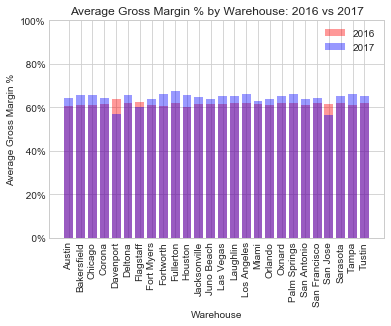

In [72]:
# Create multiple bars chart for gross margin %
multiple_bars3 = plt.figure()
x = store_merge['Warehouse']
y = store_merge['Average Gross Margin % 2016']
z = store_merge['Average Gross Margin % 2017']

ax = plt.subplot(111)
ax.bar(x, y,width=0.75,color='r',align='center', alpha = 0.4, label = "2016")
ax.bar(x, z,width=0.75,color='b',align='center', alpha = 0.4, label = "2017")

# Create legend
lgd = ax.legend(bbox_to_anchor=(1,1))

# Create axes labels
plt.xlabel('Warehouse')
plt.ylabel('Average Gross Margin %')

# Rotate x-axis labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

# Customize y-axis labels for percentages
plt.ylim(0,1)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# Create title
plt.title('Average Gross Margin % by Warehouse: 2016 vs 2017')

# Save graph as picture
plt.savefig("gross_margin_store_16_17.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Show plot
plt.show()

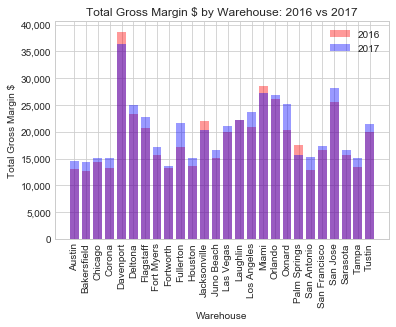

In [73]:
# Create multiple bars chart for total gross margin $
multiple_bars4 = plt.figure()
x = store_merge['Warehouse']
y = store_merge['Total Gross Margin $ 2016']
z = store_merge['Total Gross Margin $ 2017']

ax = plt.subplot(111)
ax.bar(x, y,width=0.75,color='r',align='center', alpha = 0.4, label='2016')
ax.bar(x, z,width=0.75,color='b',align='center', alpha = 0.4, label='2017')

# Create legend
lgd2 = ax.legend(bbox_to_anchor=(1,1))

# Set axes labels
plt.xlabel('Warehouse')
plt.ylabel('Total Gross Margin $')

# Rotate x labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

# Customize y-axis labels
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in vals])

# Create title
plt.title('Total Gross Margin $ by Warehouse: 2016 vs 2017')

# Save graph as picture
plt.savefig("dollar_store_16_17.png", bbox_extra_artists=(lgd2,), bbox_inches='tight')

# Show plot
plt.show()


In [74]:
data_all = pd.concat([df_2015,df_2016,df_2017])
data_all.head()

,Year,Warehouse,Division,Category Description,Style Description,Color,$ Unit Price - Outlet MSRP,$ Unit Cost - Standard,margin $,margin %,quantity
0,2015,Austin,Mens,Accessories,HURLEY HONOR ROLL CINCH SACK,426,14.99,5.63,9.36,0.624416,552
1,2015,Austin,Mens,Accessories,HURLEY HONOR ROLL PRINTED BACK,061,34.99,18.75,16.24,0.464133,4314
2,2015,Austin,Mens,Accessories,HURLEY HONOR ROLL BELT,375,11.99,6.75,5.24,0.437031,982
3,2015,Austin,Mens,Accessories,HURLEY HONOR ROLL CINCH SACK,063,14.99,5.63,9.36,0.624416,3818
4,2015,Austin,Mens,Accessories,HURLEY MATER BACKPACK,368,29.99,18.75,11.24,0.374792,2103


In [75]:
# Extract year, division/gender, and quantity data
division_data = data_all.loc[:,["Year", "Division", "quantity"]]
division_data.head()

,Year,Division,quantity
0,2015,Mens,552
1,2015,Mens,4314
2,2015,Mens,982
3,2015,Mens,3818
4,2015,Mens,2103


In [76]:
# Group data by divison/gender
men = division_data.loc[(division_data["Division"] == "Mens")]
women = division_data.loc[(division_data["Division"] == "Womens")]


In [77]:
# split the dataframe into men and women
men_df = pd.DataFrame(men)
women_df = pd.DataFrame(women)


In [78]:
men_q = men_df.groupby(["Year"]).sum()
men_q.reset_index(level=0, inplace=True)
men_q

,Year,quantity
0,2015,262773248
1,2016,336456526
2,2017,369321478


In [79]:
women_q = women_df.groupby(["Year"]).sum()
women_q.reset_index(level=0, inplace=True)
women_q

,Year,quantity
0,2015,58095925
1,2016,70897357
2,2017,112533803


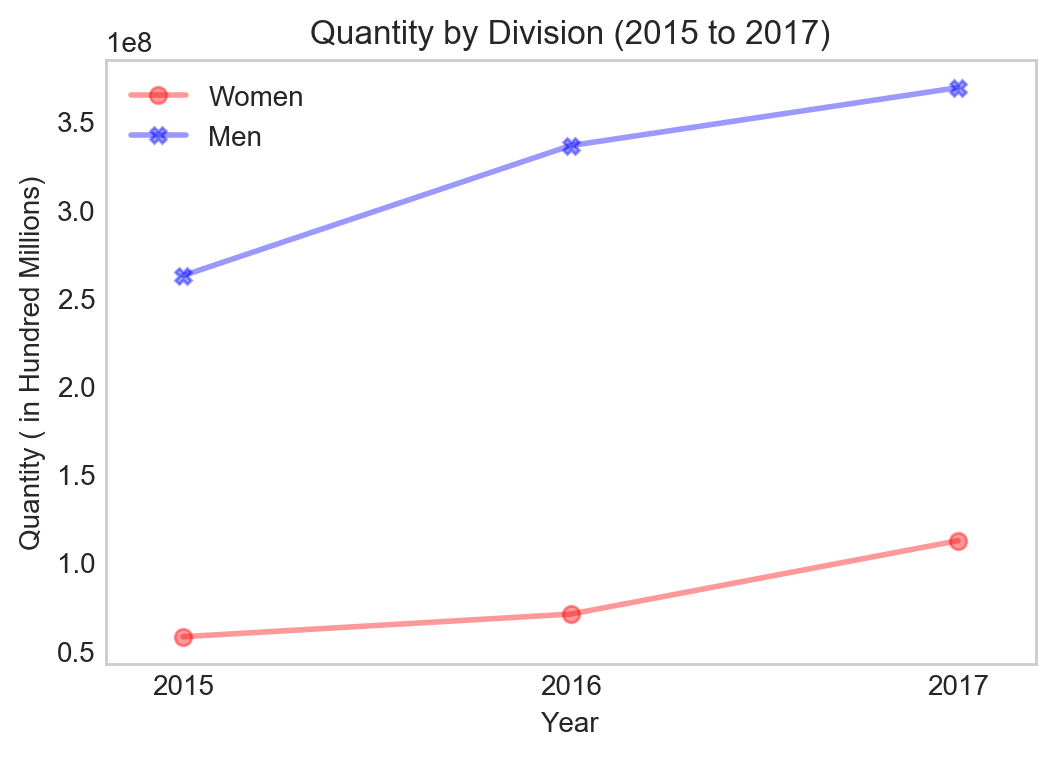

In [80]:
# Plot men and women quantities
fig = plt.figure(dpi=200)
x = women_q['Year']
y = women_q['quantity']
z = men_q['quantity']
ax = plt.subplot(111)
ax.plot(x, y,color='r', marker='o',linewidth=2,alpha = 0.4, label = "Women")
ax.plot(x, z,color='b', marker='X',linewidth=2,alpha = 0.4, label = "Men")
x_axis = np.arange(len(women_q['Year']))
plt.xlim(2014.8,2017.2)
plt.xticks(np.arange(2015,2017.5))
legend=ax.legend()
plt.xlabel('Year')
plt.ylabel('Quantity ( in Hundred Millions)')
plt.title('Quantity by Division (2015 to 2017)')
sns.set_style("whitegrid")
plt.grid(False)
plt.savefig("quantity_division.png",bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()
